In [36]:
# Start a new notebook in JupyterLab and import all of the libraries you’ll need.
# 2
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\toloz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\toloz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\toloz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
 import nltk
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\toloz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# 3
# Load the twentieth-century data that you scraped in Exercise 1.4.
# Import txt file

with open('Key_Events_20th_Century.txt', 'r', errors='ignore') as file:
    scrapped_data = file.read().replace('\n', ' ')

In [4]:
# 4 

# Tokenize the words from the text and create a bar chart to plot the 10 most common words.

# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(scrapped_data)
print(tokenized_sent)



['Key events of the 20th century - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn to editCommunity portalRecent changesUpload file Search Search Appearance Appearance move to sidebar hide TextSmallStandardLargeThis page always uses small font sizeWidthStandardWideThe content is as wide as possible for your browser window.Color (beta)AutomaticLightDarkThis page is always in light mode.', 'Donate Create account Log in Personal tools Donate Create account Log in Pages for logged out editors learn more ContributionsTalk Toggle the table of contents Contents move to sidebar hide (Top) 1 Historic events in the 20th century Toggle Historic events in the 20th century subsection 1.1 World at the beginning of the century 1.1.1 "The war to end all wars": World War I (1914â€“1918) 1.1.2 Russian Revolution and communism 1.2 Between the wars 1.2.1 Economic depression 1.2.2 The r

In [5]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(scrapped_data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Appearance', 'move', 'to', 'sidebar', 'hide', 'TextSmallStandardLargeThis', 'page', 'always', 'uses', 'small', 'font', 'sizeWidthStandardWideThe', 'content', 'is', 'as', 'wide', 'as', 'possible', 'for', 'your', 'browser', 'window.Color', '(', 'beta', ')', 'AutomaticLightDarkThis', 'page', 'is', 'always', 'in', 'light', 'mode', '.', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Toggle', 'the', 'table', 'of', 'contents', 'Contents', 'move', 'to', 'sidebar', 'hide',

In [6]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4813 samples and 21778 outcomes>


In [7]:
dist_words.most_common(10)

[(',', 2418),
 ('the', 1342),
 ('`', 1109),
 ("'", 1076),
 ('.', 920),
 ('and', 714),
 ('to', 647),
 ('a', 547),
 ('I', 487),
 ('it', 471)]

[(',', 2418),
 ('the', 1342),
 ('`', 1109),
 ("'", 1076),
 ('.', 920),
 ('and', 714),
 ('to', 647),
 ('a', 547),
 ('I', 487),
 ('it', 471)]

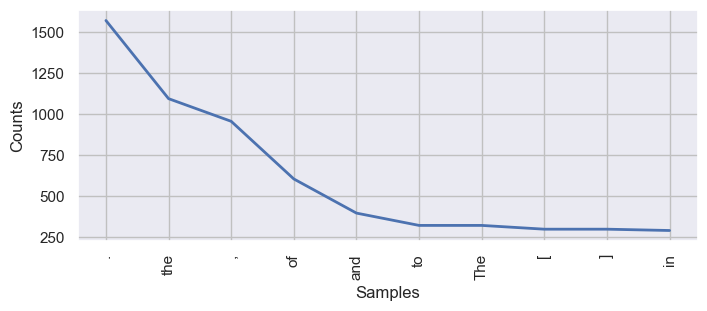

In [8]:

# Plot the 10 most common words in the frequency distribution
plt.figure(figsize=(8, 3))
dist_words.plot(10, cumulative=False)
plt.show()


# 5 Remove stop words (and punctuation marks if necessary), and rerun the plot. What has changed? Comment on your impressions in a markdown cell under the plot.

In [9]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords for English
stop_words = set(stopwords.words('english'))

# Assuming tokenized_word is already defined, here is the filtering process:
filtered_words = []  # creates an empty list
for word in tokenized_word:
    if word.lower() not in stop_words:  # Make sure comparison is case insensitive
        filtered_words.append(word)

print(filtered_words)  # Show the filtered words


['Key', 'events', '20th', 'century', '-', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Appearance', 'move', 'sidebar', 'hide', 'TextSmallStandardLargeThis', 'page', 'always', 'uses', 'small', 'font', 'sizeWidthStandardWideThe', 'content', 'wide', 'possible', 'browser', 'window.Color', '(', 'beta', ')', 'AutomaticLightDarkThis', 'page', 'always', 'light', 'mode', '.', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Toggle', 'table', 'contents', 'Contents', 'move', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', '20th', 'century', 'Toggle', 'Historic', 'events', '20th', 'century', 'subsection', '1.1',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\toloz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Create a new FreqDist for filtered-words

Dist_words_filter = FreqDist(filtered_words)
print(Dist_words_filter) 


<FreqDist with 4635 samples and 16446 outcomes>


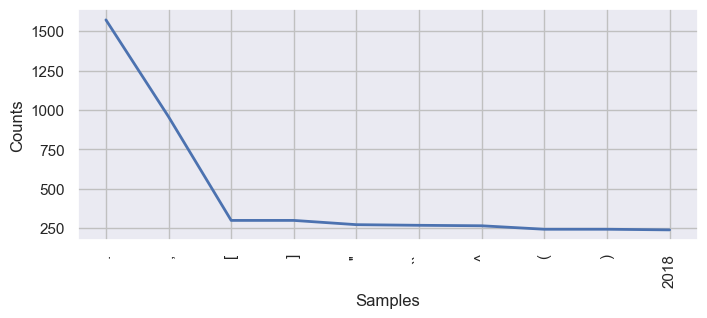

In [11]:

# Plot the 10 most common words in the frequency distribution
plt.figure(figsize=(8, 3))
Dist_words_filter.plot(10, cumulative=False)
plt.show()

In [12]:
Dist_words_filter

FreqDist({'.': 1571, ',': 957, '[': 300, ']': 300, "''": 273, '``': 269, '^': 266, '(': 244, ')': 244, '2018': 240, ...})

In [13]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [14]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    file    Search    Search    Appearance    Appearance    move    sidebar    hide    TextSmallStandardLargeThis    page    always    uses    small    font    sizeWidthStandardWideThe    content    wide    possible    browser    window Color         beta         AutomaticLightDarkThis    page    always    light    mode         Donate    Create    account    Log    Personal    tools    Donate    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Toggle    table    contents    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    subsection        

In [15]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Appearance', 'move', 'sidebar', 'hide', 'TextSmallStandardLargeThis', 'page', 'always', 'uses', 'small', 'font', 'sizeWidthStandardWideThe', 'content', 'wide', 'possible', 'browser', 'window', 'Color', 'beta', 'AutomaticLightDarkThis', 'page', 'always', 'light', 'mode', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Toggle', 'table', 'contents', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end

In [16]:
# Create a new FreqDist

Dist_words_filter_2 = FreqDist(tokenized_word_2)

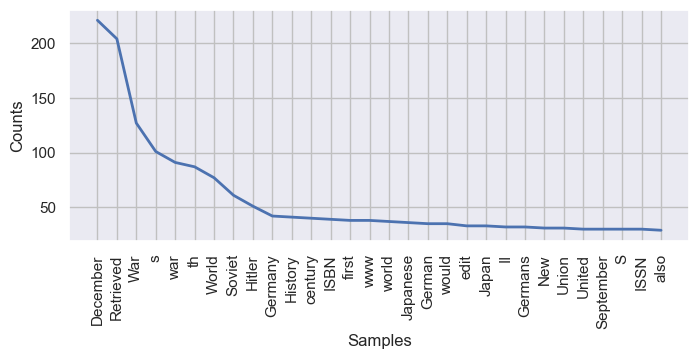

In [17]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
Dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [18]:
Dist_words_filter_2.most_common(20)

[('December', 221),
 ('Retrieved', 204),
 ('War', 127),
 ('s', 101),
 ('war', 91),
 ('th', 87),
 ('World', 77),
 ('Soviet', 61),
 ('Hitler', 51),
 ('Germany', 42),
 ('History', 41),
 ('century', 40),
 ('ISBN', 39),
 ('first', 38),
 ('www', 38),
 ('world', 37),
 ('Japanese', 36),
 ('German', 35),
 ('would', 35),
 ('edit', 33)]

# 6 

# Create a tags list using TextBlob.

In [19]:
new_stopwords = [ 'S', 's' ]

In [20]:
filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [26]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 5.01 ms


In [37]:
text

TextBlob("['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Appearance', 'move', 'sidebar', 'hide', 'TextSmallStandardLargeThis', 'page', 'always', 'uses', 'small', 'font', 'sizeWidthStandardWideThe', 'content', 'wide', 'possible', 'browser', 'window', 'Color', 'beta', 'AutomaticLightDarkThis', 'page', 'always', 'light', 'mode', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Toggle', 'table', 'contents', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', '

In [46]:
from textblob import TextBlob

import nltk
nltk.download('averaged_perceptron_tagger_eng')

text = TextBlob(str(filtered))
tags_list = text.tags
print(tags_list)



[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\toloz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


[('[', 'JJ'), ("'Key", 'NNP'), ("'", 'POS'), ("'events", 'NNS'), ("'", 'POS'), ("'th", 'NNP'), ("'", 'POS'), ("'century", 'NNP'), ("'", 'POS'), ("'Wikipedia", 'NNP'), ("'", 'POS'), ("'Jump", 'NNP'), ("'", 'POS'), ("'content", 'NNP'), ("'", 'POS'), ("'menu", 'NNP'), ("'", 'POS'), ("'menu", 'NNP'), ("'", 'POS'), ("'move", 'NNP'), ("'", 'POS'), ("'sidebar", 'NNP'), ("'", 'POS'), ("'hide", 'NNP'), ("'", 'POS'), ("'Navigation", 'NN'), ("'pageContentsCurrent", 'NNP'), ("'", 'POS'), ("'eventsRandom", 'NNP'), ("'", 'POS'), ("'articleAbout", 'IN'), ("'WikipediaContact", 'NNP'), ("'", 'POS'), ("'us", 'NNP'), ("'", 'POS'), ("'HelpLearn", 'NNP'), ("'", 'POS'), ("'editCommunity", 'NNP'), ("'", 'POS'), ("'portalRecent", 'NNP'), ("'", 'POS'), ("'file", 'IN'), ("'Search", 'NNP'), ("'", 'POS'), ("'Search", 'NNP'), ("'", 'POS'), ("'Appearance", 'NN'), ("'Appearance", 'NNP'), ("'", 'POS'), ("'move", 'NNP'), ("'", 'POS'), ("'sidebar", 'NNP'), ("'", 'POS'), ("'hide", 'NNP'), ("'", 'POS'), ("'TextSmallStand

In [47]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Appearance", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'

# 7

# Create a list of the Top 10 POS tags for words that appear in the article.

In [50]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top10=df_t.nlargest(10, 'Words')

# 8 

# Plot this list in a bar chart using the seaborn library. Note: If you were with us for the Data Immersion Program, you’ve already learned about seaborn in Achievement 4. If Seaborn is new to you, use this introductory resource to walk you through it.

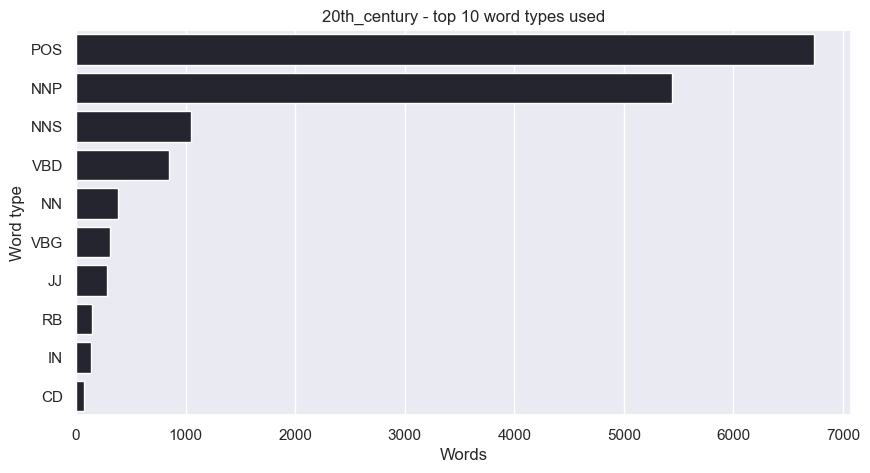

In [51]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top10).set_title("20th_century - top 10 word types used")

# 9

# Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives. Analyzing the results—what do you think stands out in these frequencies? Comment on your impressions in a Markdown cell under the plot.

In [52]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [53]:
top10

,Word,Occurences
290,'December,221
1234,'War,127
2552,'war,91
2473,'th,87
1272,'World,77
1082,'Soviet,61
528,'Hitler,51
527,'History,41
1463,'century,40
550,'ISBN,39


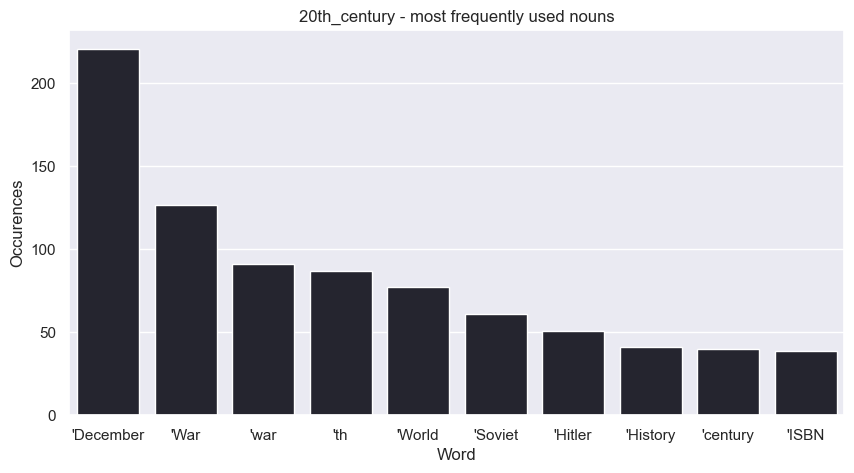

In [54]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top10).set_title("20th_century - most frequently used nouns")

In [55]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

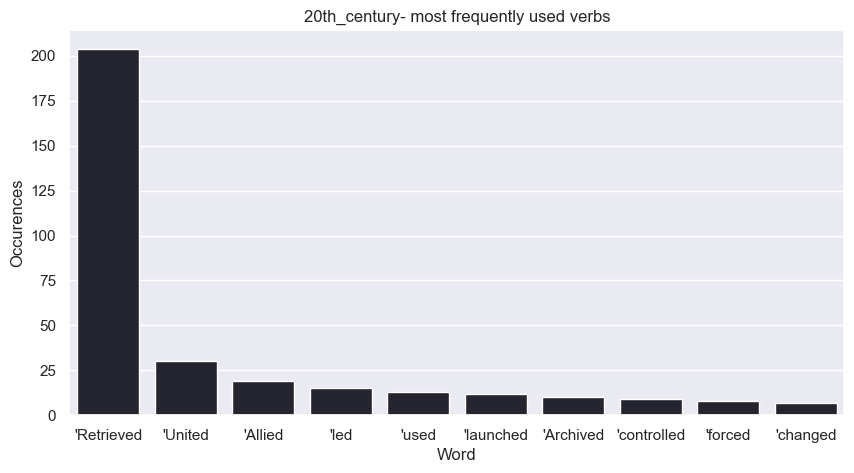

In [56]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top10).set_title("20th_century- most frequently used verbs")

In [57]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

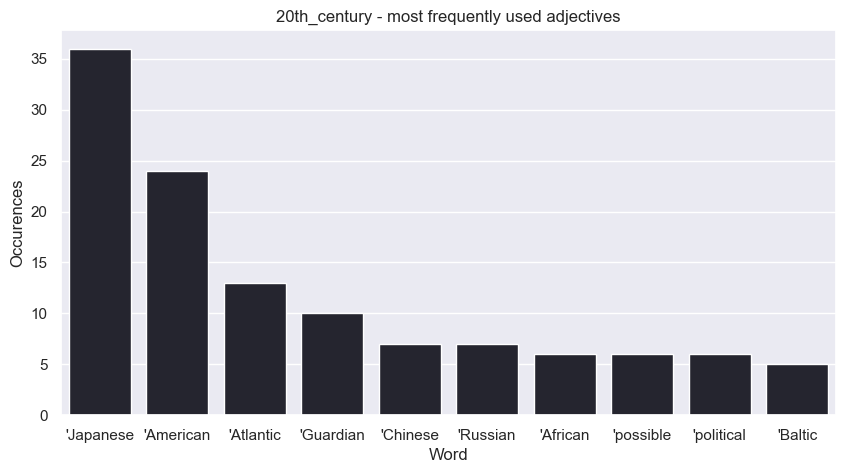

In [58]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("20th_century - most frequently used adjectives")

### Since December appears frequently, it might indicate that most of the important events occurred in December.

# 10

# Create a dataframe with the countries and the number of times they’re mentioned in your text (remember—you’ll need to use the countries lookup list if you didn’t scrape one in the previous task).

In [67]:
# Example countries lookup list (add variations manually or use pycountry)
countries_lookup = ["United States", "USA", "China", "India", "Germany", "France", "Russia", "Canada", "Australia", "Japan", "Brazil"]

# Example filtered text (replace with your actual text)
text = str(filtered)

# Preprocess text: remove punctuation and convert to lowercase
text_data_clean = text.translate(str.maketrans("", "", string.punctuation)).lower()

# Preprocess lookup list: convert countries to lowercase
countries_lookup_clean = [country.lower() for country in countries_lookup]

# Tokenize the cleaned text
tokens = word_tokenize(text_data_clean)

# Count occurrences of each country in the text
country_counts = {country: tokens.count(country) for country in countries_lookup_clean}

# Filter out countries with 0 mentions
country_counts = {k: v for k, v in country_counts.items() if v > 0}

# Convert to a DataFrame
country_df = pd.DataFrame(list(country_counts.items()), columns=["Country", "Mentions"])

# Sort by number of mentions
country_df = country_df.sort_values(by="Mentions", ascending=False)

print(country_df)


     Country  Mentions
3    germany        42
8      japan        33
4     france        16
1      china        10
2      india         9
5     russia         9
6     canada         2
7  australia         2
0        usa         1


# 11

### Create a plot showing the frequency of the number of times these countries are mentioned in the text. Is there anything in particular you notice in this plot? Describe your findings in a Markdown cell underneath the plot.

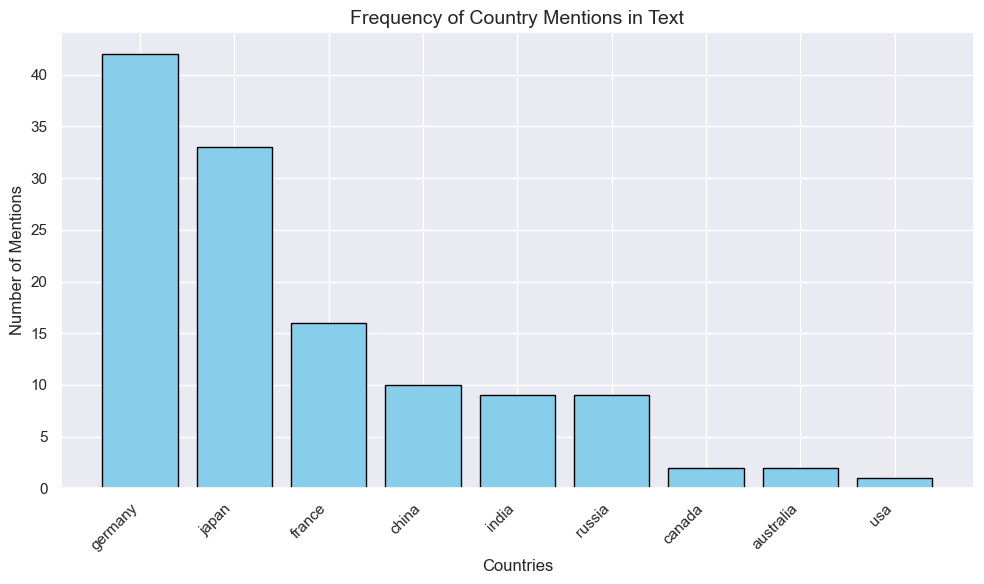

In [68]:
import matplotlib.pyplot as plt

# If the DataFrame is empty, handle the case gracefully
if not country_df.empty:
    # Plot the frequency of mentions
    plt.figure(figsize=(10, 6))
    plt.bar(country_df["Country"], country_df["Mentions"], color="skyblue", edgecolor="black")
    plt.xlabel("Countries", fontsize=12)
    plt.ylabel("Number of Mentions", fontsize=12)
    plt.title("Frequency of Country Mentions in Text", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No countries were mentioned in the text, so the plot cannot be created.")


### Top Mentions: Germany and Japan are the most frequently mentioned countries, with Germany having the highest count of mentions.

### Distribution: The mentions decrease significantly after the top three countries (Germany, Japan, and France), indicating a clear focus on these regions in the text.

### Patterns or Anomalies:

### Germany's prominence may suggest the text focuses on topics like European history or geopolitics.The lower mentions for countries like the USA, Canada, and Australia might indicate a more regional or historical context not heavily involving them.